In [1]:
import config
from cnn_builder import *
from config import *
from dataset_functions import *
from hypercube_set import HypercubeSet
from hypercube_loader import *
import rendering

import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'
os.chdir(os.getcwd().split("jupyter")[0])

inf = 2e32

%load_ext autoreload
%autoreload 2

read_json_config(paths.config_file, network_type=None)

In [2]:
hc_set = HypercubeSet(hc_array=load_hypercubes(plot_hc=False, plot_mask=False, n_max_cubes=inf))
hc_set.print_metadata()

Reading media/Mateus_2022/Area01\raw_112_rf.hdr ...
Reading media/Mateus_2022/Area01\raw_1984_rf.hdr ...
Reading media/Mateus_2022/Area01\raw_3904_rf.hdr ...
Reading media/Mateus_2022/Area01\raw_5744_rf.hdr ...
Reading media/Mateus_2022/Area01\raw_7584_rf.hdr ...
Min: 0.006377667188644409, Max: 0.16416394710540771, Size: (1840, 3200, 223)


In [3]:
hc_set.obtain_ground_labels()
hc_set.obtain_train_indices(test_percentage=test_split, patch_size=config.patch_size, patch_overlapping=config.patch_overlapping)

In [4]:
X_train_01, y_train_01 = hc_set.split_train(patch_size=config.patch_size)
y_train_01_reduced = reduce_labels_center(y_train_01)

|████████████████████████████████████████| 52104/52104 [100%] in 0.3s (216061.16/s)                                     


In [5]:
hc_set.obtain_ground_labels()
hc_set.obtain_train_indices(test_percentage=test_split, patch_size=config.patch_size, patch_overlapping=config.patch_overlapping)

In [6]:
hc_set.standardize()

|████████████████████████████████████████| 2/2 [100%] in 15.0s (0.09/s)                                                 


In [7]:
X_train_02, y_train_02 = hc_set.split_train(patch_size=config.patch_size)
y_train_02_reduced = reduce_labels_center(y_train_02)

|████████████████████████████████████████| 52104/52104 [100%] in 0.4s (138913.57/s)                                     


<Figure size 1300x800 with 0 Axes>

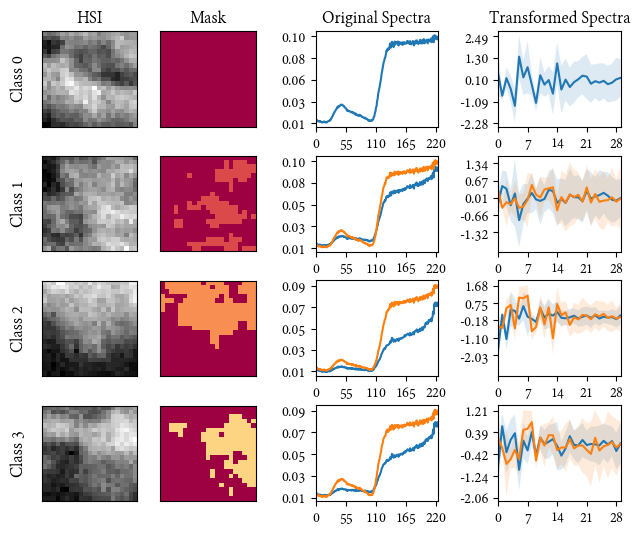

In [11]:
render_patches_examples(original_patches=X_train_01, standard_patches=X_train_02, labels=y_train_01, reduced_labels=y_train_01_reduced, target_labels=[0, 1, 2, 3])

In [ ]:
X_train_augment, y_train_augmented = augment_chunks(X_train_01, y_train_01)

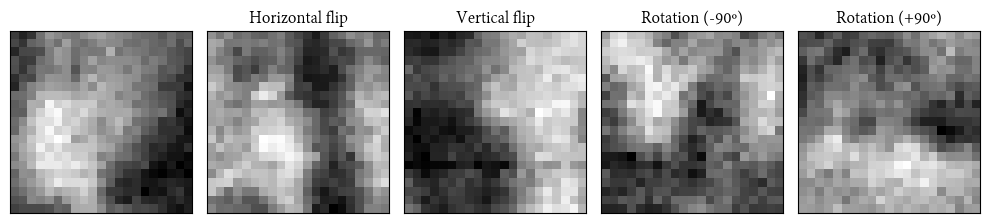

In [34]:
patch_idx = np.random.randint(len(X_train_01))
while y_train_01_reduced[patch_idx] == 0:
    patch_idx = np.random.randint(len(X_train_01))

rendering.render_patch_augmentation(X_train_augment[patch_idx * 5:patch_idx * 5 + 5])

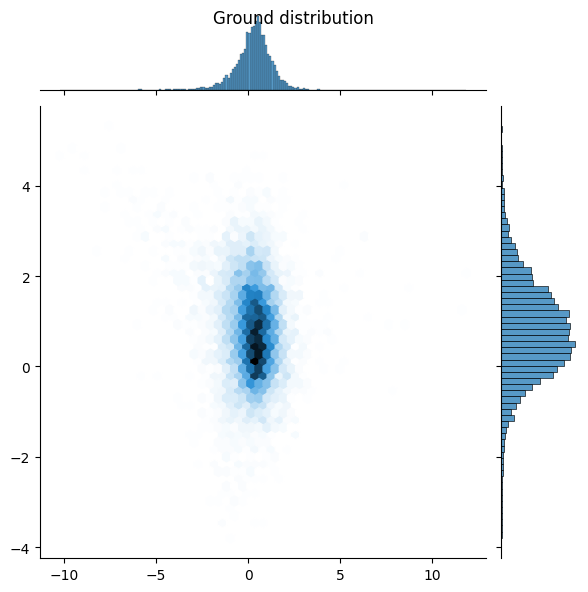

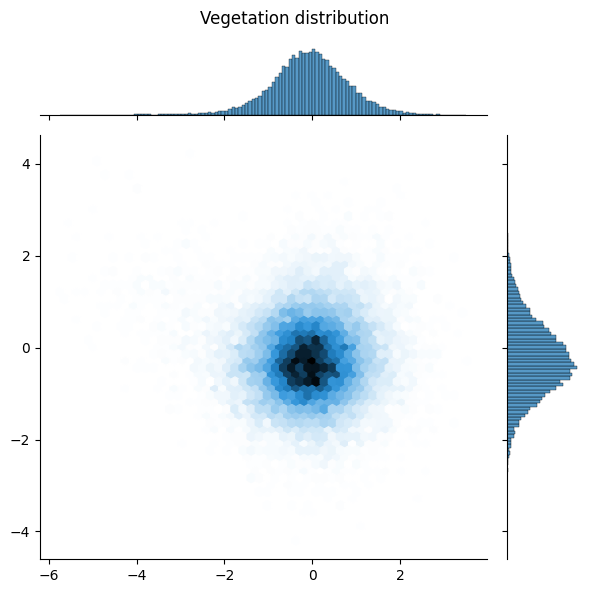

<Figure size 640x480 with 0 Axes>

In [134]:
X_train_flatten = get_center(X_train_02)
rendering.render_label_distribution(X_train_flatten, y_train_02_reduced)